# Homework 6
## Adam Sanchez 
### MATH 4650

______________________________________________________________________________________________________________________

### 1)

#### a)  

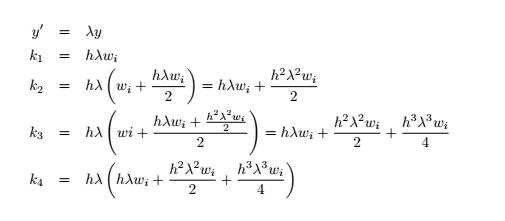

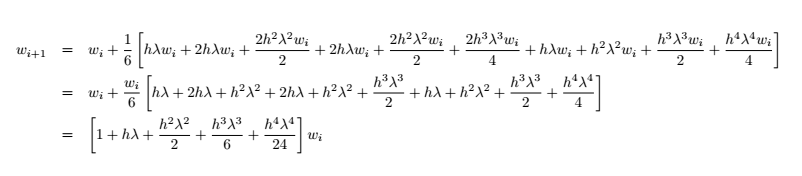


#### b)  

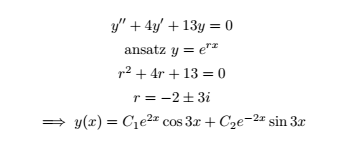


#### c) 

From b we know $\lambda = -2$. We know a multistep method will be stable iff $h < \frac{2}{|\lambda|}$ where $\lambda < 0$. Since this is true for us we know the RK4 method will be stable for this problem. Further: 

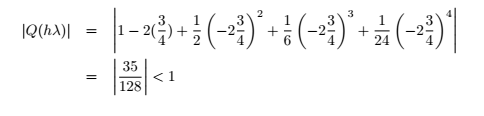

So RK4 will have stability with regard to both the growth of round-off error and absolute error.

______________________________________________________________________________________________________________________

In [1]:
import numpy as np
from timeit import time 
from time import perf_counter
from scipy.fftpack import dct
from scipy.linalg import solve, lu_factor, lu_solve, inv
import matplotlib.pyplot as plt
import matplotlib as mpl

______________________________________________________________________________________________________________________

### 2)

#### a)  

for this I found some nice code that helped from https://martin-thoma.com/solving-linear-equations-with-gaussian-elimination/

In [2]:
def gauss(A,b):
    
    n = len(A)
    A = np.c_[A, b]

    for i in range(0, n):
        # Search for maximum in this column
        maxEl = abs(A[i][i])
        maxRow = i
        for k in range(i + 1, n):
            if abs(A[k][i]) > maxEl:
                maxEl = abs(A[k][i])
                maxRow = k

        # Swap maximum row with current row (column by column)
        for k in range(i, n + 1):
            tmp = A[maxRow][k]
            A[maxRow][k] = A[i][k]
            A[i][k] = tmp

        # Make all rows below this one 0 in current column
        for k in range(i + 1, n):
            c = -A[k][i] / A[i][i]
            for j in range(i, n + 1):
                if i == j:
                    A[k][j] = 0
                else:
                    A[k][j] += c * A[i][j]

    # Solve equation Ax=b for an upper triangular matrix A
    x = [0 for i in range(n)]
    for i in range(n - 1, -1, -1):
        x[i] = A[i][n] / A[i][i]
        for k in range(i - 1, -1, -1):
            A[k][n] -= A[k][i] * x[i]
    return A, x

#### b)  

In [69]:
A = dct(np.eye(10), axis=0)
A = np.array(A/2)
x = np.arange(1,11).reshape(10,1)
b= np.dot(A,x)

In [77]:
A_upp,x_est = gauss(A,b)
A_upp = np.round(A_upp, 2)

The augmented is: 

In [78]:
print('\n'.join([''.join(['{:4}'.format(item) for item in row]) 
      for row in A_upp]))

 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0
 0.0-1.54-0.590.36-1.18-1.180.36-0.59-1.54 0.0-3.08
 0.0 0.0-1.38-1.380.850.85-1.38-1.38 0.0 0.0-4.15
 0.0 0.0 0.0-2.51.551.55-2.5 0.0 0.0 0.0-10.0
 0.0 0.0 0.0 0.0-2.63-2.63 0.0 0.0 0.0 0.0-13.14
 0.0 0.0 0.0 0.0 0.0-1.981.78-1.410.91-0.31-11.85
 0.0 0.0 0.0 0.0 0.0 0.02.790.76 0.1-1.9319.56
 0.0 0.0 0.0 0.0 0.0 0.0 0.03.160.86-3.0425.3
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.03.58-3.2332.21
 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0-5.06-50.62


The point by point error for x is: 

In [86]:
pt_error = x_est-x.T
pt_error

array([[ 5.32907052e-15,  2.66453526e-15, -1.77635684e-15,
         8.88178420e-16,  2.66453526e-15, -6.21724894e-15,
        -2.66453526e-15,  1.77635684e-15, -1.77635684e-15,
         3.55271368e-15]])

#### c)  

From the code below we can see that it took my approximatly computer 3 minutes and 42 seconds to run and resulted in an error of 3.637978807091713e-12

In [5]:
A = dct(np.eye(1000), axis=0)
A = np.array(A/2)
x = np.arange(1,1001).reshape(1000,1)
b= np.dot(A,x)

t_start = perf_counter()
A_upp, x_est = gauss(A,b)
t_end = perf_counter()

print('The runtime was: ', t_end-t_start)

The runtime was:  205.66385074400023


In [111]:
error = abs(np.linalg.norm(x)-np.linalg.norm(x_est))
error

3.637978807091713e-12

### d)  

From the code below we can see that Scipy's package took only about 0.10247 seconds to run with an error of 1.0913936421275139e-11. So not only is this package much much faster than our code but it also provides a smaller error too. Obvisiouly this was expected. I assume the Scipy package uses better factorization methods to drastically help improve the time. 

In [6]:
t_start = perf_counter()
x_calc = solve(A,b)
t_end = perf_counter()

print('The runtime was: ', t_end-t_start)

The runtime was:  0.10247087799507426


In [114]:
error = abs(np.linalg.norm(x)-np.linalg.norm(x_calc))
error

1.0913936421275139e-11

______________________________________________________________________________________________________________________

### 3)

#### a)  

##### i)  

In [ ]:
x1 = solve(A,b)

##### ii)  

In [122]:
def solver(A,b): 
    lu,piv = lu_factor(A)
    x = lu_solve((lu,piv), b)
    return x

##### iii)  

In [123]:
def inverse_solver(A,b): 
    A_inv = inv(A)
    x=np.dot(A_inv,b)
    return x

In [128]:
#Testing our 3 piecies of high level code; x = [2,1]
A = np.array([[ 1, 2 ], 
              [ 3, -5 ]])
b = np.array([4,1])

x1 = solve(A,b)
print('x1 is: ', x1)
x2 = solver(A,b)
print('x2 is: ', x2)
x3 = inverse_solver(A,b)
print('x3 is: ', x3)

x1 is:  [2. 1.]
x2 is:  [2. 1.]
x3 is:  [2. 1.]


#### b)  

From the last graph it appears that time is $O(n^2)$ since it is a log-log plot. 

What I think is most intresting is that the inverse method appears to have lowest errors, however it is always consistently slower than the other two, which makes complete sense because finding the inverse can take a long time. Another surprising result is the fact that the Scipy Solver and the LU method solver have the errors for almost every n but the LU method is marginally faster than the Scipy Solver package. The error part isnt that surprising since I assume the package does something very similar to LU factorization in the background, but I guess my code must be more efficient (ha!).  

In [163]:
nList = np.logspace(3,3.699).astype(int)
nList = np.round(nList,0)
errScipySolve = []
errLU = []
errInverse = []
ScipyTime = []
LUTime = []
InverseTime = []

for n in nList: 
    A = dct(np.eye(n), axis=0)
    A = np.array(A/2)
    x = np.arange(1,n+1).reshape(n,1)
    b= np.dot(A,x)
    
    t1 = perf_counter()
    x1 = solve(A,b)
    t2 = perf_counter()
    errScipySolve.append(abs(np.linalg.norm(x)-np.linalg.norm(x1)))
    ScipyTime.append(t2-t1)
    
    t3 = perf_counter()
    x2 = solver(A,b)
    t4 = perf_counter()
    errLU.append(abs(np.linalg.norm(x)-np.linalg.norm(x2)))
    LUTime.append(t4-t3) 
    
    t5 = perf_counter()
    x3 = inverse_solver(A,b)
    t6 = perf_counter()
    errInverse.append(abs(np.linalg.norm(x)-np.linalg.norm(x3)))
    InverseTime.append(t6-t5)

Text(0.5,1,'Error vs n')

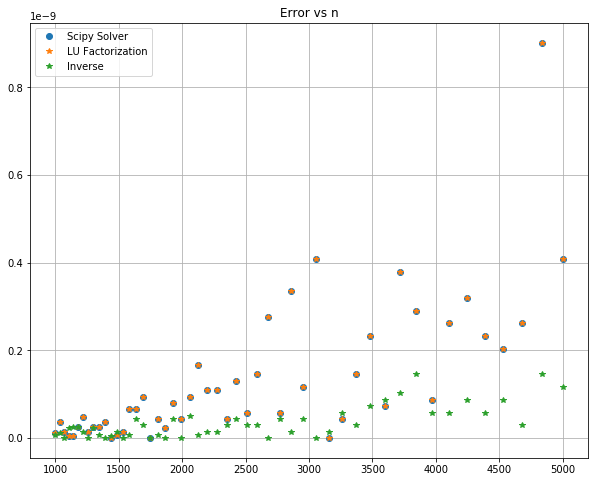

In [171]:
plt.figure(figsize=(10,8)) 
plt.plot( nList, errScipySolve,'o',label='Scipy Solver');
plt.plot( nList, errLU,'*',label='LU Factorization');
plt.plot( nList, errInverse,'*',label='Inverse');
plt.grid()
plt.legend();
plt.title('Error vs n')

Text(0.5,1,'Time vs n')

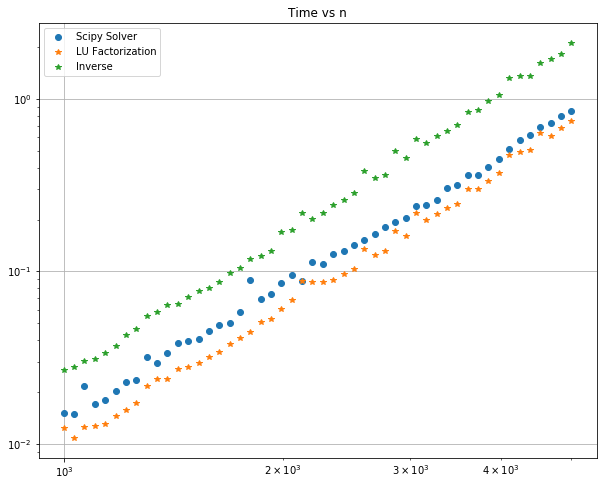

In [169]:
plt.figure(figsize=(10,8)) 
plt.loglog( nList, ScipyTime,'o',label='Scipy Solver');
plt.loglog( nList, LUTime,'*',label='LU Factorization');
plt.loglog( nList, InverseTime,'*',label='Inverse');
plt.grid()
plt.legend();
plt.title('Time vs n')